In [66]:
# your name: Esau Bojorquez Medina
# date: 02/21/24
# course number: CSC 647-01
# assignment/activity # and brief stmt of purpose:
# Activity: Coding Project 2
# Bit flipping with both classical and Quantum operations. 

In [67]:
# import qiskit and numpy
from qiskit import QuantumCircuit, visualization
from qiskit import Aer, BasicAer, assemble, transpile, execute
from qiskit.quantum_info import Statevector, Operator
from datetime import datetime
from qiskit.tools.visualization import plot_histogram, plot_state_city,plot_bloch_multivector
import qiskit.quantum_info as qi
import numpy as np

In [68]:
#PART 1 A

# Given a set of 2^3 3-bit vectors, [000, 001, … , 110, 111],
#   flip the two most significant bits (MSBs) if the least significant bit
#   (LSB) is set. The LSB of input always goes to the output.

#data set
in_data = [0b000, 0b001, 0b010, 0b011,  0b100, 0b101, 0b110, 0b111]
print("Before:\t",*in_data)
    
#iterating over our array
for bit in in_data:
    #If the least most bit is engaged we have an odd number,
    # using this we can filter
    if in_data[bit] % 2 != 0:
        print("  Binary before:\t", bin(in_data[bit])[2:].zfill(3))
        # 6 = 0b110 we can use that to flip the 2 most significant bits
        in_data[bit] = (in_data[bit] ^ 6)
        print("  Binary flipped:\t", bin(in_data[bit])[2:].zfill(3))
print("After:\t",*in_data)     



Before:	 0 1 2 3 4 5 6 7
  Binary before:	 001
  Binary flipped:	 111
  Binary before:	 011
  Binary flipped:	 101
  Binary before:	 101
  Binary flipped:	 011
  Binary before:	 111
  Binary flipped:	 001
After:	 0 7 2 5 4 3 6 1


In [69]:
#PART 1 B

#  You will create multiple circuits: one for each of the input values.
# To initialize the state of your qubits to reflect the bit settings of the
# input values, DO NOT USE qiskit’s Initialize method. Instead, assume that
# qubits are created in a |0> state, and if you need to flip the state to |1>,
# use the appropriate gate (eg, from CP1) that flips the state of a specific 
# qubit. You do not need a measurement gate in this circuit.

# 3 qubit circuit function for bin numbers 1-8
def makeQC(qcSpecs):
    builder = QuantumCircuit(3)
    if qcSpecs == 1: 
        #First qubit 
        builder.x(0)
    elif qcSpecs == 2:
        #second qubit
        builder.x(1)
    elif qcSpecs == 3:
        #Fist 2 qubits
        builder.x([0, 1])
    elif qcSpecs == 4:
        #last qubit
        builder.x(2)
    elif qcSpecs == 5:
        #Last 2 qubits
        builder.x([2, 1])
    elif qcSpecs == 6:
        #
        builder.x([2,1])
    elif qcSpecs == 7:
        builder.x([0, 1, 2])
    return builder

#data set
in_data = [0b000, 0b001, 0b010, 0b011,  0b100, 0b101, 0b110, 0b111]

#loop for our iterations
for i in in_data:
    # Printing input value
    print("Binary:\t", bin(i)[2:].zfill(3))
    #calling function to make out 
    QC = makeQC(i)
    if i % 2 != 0:
        #flipping from first quibit 
        QC.cx(0, 1)  
        QC.cx(0, 2)
        print("*flipped two MSB*")
    print("Statevector:") 
    display(Statevector(QC).draw("latex"))
    print("Circuit:")
    print(QC)
    
    
#     Discussion questions:

# What gate do you use in your circuit to test what happens on 
# one qubit but then influences what happens on a different qubit?

#   The gate I used was the CX gate. This cNot gate is placed on the first
# qubit ready to flip our second and last qubit.

# What type of condition, or relationship, does that gate create between
# pairs of qubits?

#  It would create an "or" condition between the qubits because when our 
# conditional bit is engaged we can flip our other bit. The reason it is not and
# would be due to the triggering points for the cNot gate.


# Describe what happens in your circuit (for one qubit pair) when
# this condition exists.

# When this condition exists, the circuit checks if our conditional qubit 
# is engaged. If so, our target qubit would then be flipped. From 1 to 0 and 0 to 1.

    
   




Binary:	 000
Statevector:


<IPython.core.display.Latex object>

Circuit:
     
q_0: 
     
q_1: 
     
q_2: 
     
Binary:	 001
*flipped two MSB*
Statevector:


<IPython.core.display.Latex object>

Circuit:
     ┌───┐          
q_0: ┤ X ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘
Binary:	 010
Statevector:


<IPython.core.display.Latex object>

Circuit:
          
q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘
q_2: ─────
          
Binary:	 011
*flipped two MSB*
Statevector:


<IPython.core.display.Latex object>

Circuit:
     ┌───┐          
q_0: ┤ X ├──■────■──
     ├───┤┌─┴─┐  │  
q_1: ┤ X ├┤ X ├──┼──
     └───┘└───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘
Binary:	 100
Statevector:


<IPython.core.display.Latex object>

Circuit:
          
q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
Binary:	 101
*flipped two MSB*
Statevector:


<IPython.core.display.Latex object>

Circuit:
                    
q_0: ───────■────■──
     ┌───┐┌─┴─┐  │  
q_1: ┤ X ├┤ X ├──┼──
     ├───┤└───┘┌─┴─┐
q_2: ┤ X ├─────┤ X ├
     └───┘     └───┘
Binary:	 110
Statevector:


<IPython.core.display.Latex object>

Circuit:
          
q_0: ─────
     ┌───┐
q_1: ┤ X ├
     ├───┤
q_2: ┤ X ├
     └───┘
Binary:	 111
*flipped two MSB*
Statevector:


<IPython.core.display.Latex object>

Circuit:
     ┌───┐          
q_0: ┤ X ├──■────■──
     ├───┤┌─┴─┐  │  
q_1: ┤ X ├┤ X ├──┼──
     ├───┤└───┘┌─┴─┐
q_2: ┤ X ├─────┤ X ├
     └───┘     └───┘


In [70]:
#Part 2

# 3 qubit circuit function for bin numbers 1-8
def makeQC(qcSpecs):
    builder = QuantumCircuit(3)
    if qcSpecs == 1: 
        builder.x(2)
    elif qcSpecs == 2:
        builder.x(1)
    elif qcSpecs == 3:
        builder.x([1, 2])
    elif qcSpecs == 4:
        builder.x(0)
    elif qcSpecs == 5:
        builder.x([0, 1])
    elif qcSpecs == 6:
        builder.x([0,1])
    elif qcSpecs == 7:
        builder.x([0, 1, 2])
    return builder

in_data = [0b000, 0b001, 0b010, 0b011,  0b100, 0b101, 0b110, 0b111]

#loop for our iterations
for i in in_data:
    # Printing input value
    print("----------------------------")
    print("Binary:\t", bin(i)[2:].zfill(3))
    #calling function to make out 
    QC = makeQC(i)
    if i % 2 != 0:
        #flipping from quibit 3
        QC.cx(2, 0)  
        QC.cx(2, 1)
        print("*flipped two MSB*")
    print("Statevector:") 
    display(Statevector(QC).draw("latex"))
    print("Circuit:")
    print(QC)
    
# Discussion questions:
# What gate do you use in your circuit to test what happens on one qubit 
# but then influences what happens on a different qubit?

#  -  The gate I used was also the CX gate. This cNot gate is placed on the last
# qubit ready to flip our first and second qubit.

# What type of condition, or relationship, does that gate create 
# between pairs of qubits?

#  -  This helps us create an "or" condition allowing us to flip based on 
#   qubit current state. 

# Describe what happens in your circuit when this condition exists?

#  -  In this circuit, we are initializing the circuit in another method. 
#  Then whenever we come accross an odd binary number we would need to flip MSBs.
#  So after hitting this condition teh cNot gate is applied allowing for the circuit 
#  to check on our last bit. Seeing it is engaged, the other bits would then be flipped. 
    
    

----------------------------
Binary:	 000
Statevector:


<IPython.core.display.Latex object>

Circuit:
     
q_0: 
     
q_1: 
     
q_2: 
     
----------------------------
Binary:	 001
*flipped two MSB*
Statevector:


<IPython.core.display.Latex object>

Circuit:
          ┌───┐     
q_0: ─────┤ X ├─────
          └─┬─┘┌───┐
q_1: ───────┼──┤ X ├
     ┌───┐  │  └─┬─┘
q_2: ┤ X ├──■────■──
     └───┘          
----------------------------
Binary:	 010
Statevector:


<IPython.core.display.Latex object>

Circuit:
          
q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘
q_2: ─────
          
----------------------------
Binary:	 011
*flipped two MSB*
Statevector:


<IPython.core.display.Latex object>

Circuit:
          ┌───┐     
q_0: ─────┤ X ├─────
     ┌───┐└─┬─┘┌───┐
q_1: ┤ X ├──┼──┤ X ├
     ├───┤  │  └─┬─┘
q_2: ┤ X ├──■────■──
     └───┘          
----------------------------
Binary:	 100
Statevector:


<IPython.core.display.Latex object>

Circuit:
     ┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────
          
----------------------------
Binary:	 101
*flipped two MSB*
Statevector:


<IPython.core.display.Latex object>

Circuit:
     ┌───┐┌───┐     
q_0: ┤ X ├┤ X ├─────
     ├───┤└─┬─┘┌───┐
q_1: ┤ X ├──┼──┤ X ├
     └───┘  │  └─┬─┘
q_2: ───────■────■──
                    
----------------------------
Binary:	 110
Statevector:


<IPython.core.display.Latex object>

Circuit:
     ┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     └───┘
q_2: ─────
          
----------------------------
Binary:	 111
*flipped two MSB*
Statevector:


<IPython.core.display.Latex object>

Circuit:
     ┌───┐┌───┐     
q_0: ┤ X ├┤ X ├─────
     ├───┤└─┬─┘┌───┐
q_1: ┤ X ├──┼──┤ X ├
     ├───┤  │  └─┬─┘
q_2: ┤ X ├──■────■──
     └───┘          


Circuit:
          ┌───┐┌───┐┌───┐
q_0: ─────┤ X ├┤ H ├┤ X ├
     ┌───┐└─┬─┘├───┤└───┘
q_1: ┤ H ├──■──┤ H ├─────
     └───┘     └───┘     


<IPython.core.display.Latex object>

Statevector([0.+0.0000000e+00j, 0.+0.0000000e+00j, 1.-1.2246468e-16j,
             0.+0.0000000e+00j],
            dims=(2, 2))


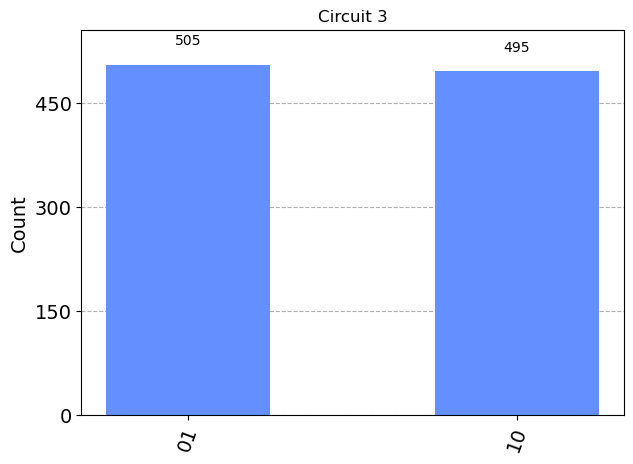

In [72]:
#Part 3

# Construct a 2-qubit quantum circuit that will result in
# a final distribution that concentrates 50% of the probabilities
# on states |10> and |01>. This circuit should include gates that
# create states of superposition, whatever gates you need to steer 
# the solution towards the target states, and measurement gates. Run
# this circuit using the aer_simulator simulator for 1000 shots.
# Obtain the counts from the results() object and plot the histogram
# of counts/probabilities using qiskit’s plot_distribution() method 
# to show your results. 

# 2 qubit circuit
QC3 = QuantumCircuit(2)

#Gates to get 01 and 10
QC3.h(1)
QC3.cx(1,0)
QC3.h([0,1])
QC3.x(0)

#printing Circuit
print("Circuit:")
print(QC3)

#Printing Statevector
display(Statevector(QC3).draw("latex"))


#Measuring and saving
QC3.measure_all()
QC3.save_statevector()


# Running circuit
os = Aer.get_backend('aer_simulator_statevector')
QC3 = transpile(QC3, os)

#1000 shots
res = os.run(QC3,shots = 1000)

# Grabbing/printing saved state vector
stateVec = res.result().get_statevector()
print(stateVec)

#Obtaining COUNTS and printing. 
value = res.result().get_counts()

# Histogram
plot_histogram(value, title = "Circuit 3")



# Discussion questions:
# In this example we are using the aer_simulator and displaying 
# a distribution of counts. Describe the difference between displaying
# results as histograms of counts compared to displaying the state vector 
# as in Parts 1 and 2 of this assignment. What information is contained in
# the counts that is not present in the state vector, and why?

# - Displaying the histogram, we are running the circut a great deal of times.
# This allows us to have the main difference of percentage based data. Where 
# as displaying the state vector, it is only taking into account the measurment
# at a specific time. 

# In this example, how many computational basis states exist in this 
# circuit? In other words, what are the potential outcomes of this circuit?

# - For this circit there are 2 outcomes. The state typically lands at a 50-50% between 
# |01> and |10>

# How would this number of potential outcomes change if, say, we had
# N=4 qubits, or N=8 qubits?

# The number of outcomes would not change, however the amount of data we can get
# would be at a greater level of accuracy. 